In [0]:
%tensorflow_version 1.x

In [0]:
#Importing important modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization

In [0]:
#Initialize Batch Normalization
bn = BatchNormalization()

In [38]:
#Mount the google drive 
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Copy the input file from Google drive to local
!cp /content/gdrive/My\ Drive/Datasets/SVHN_single_grey1.h5 .


In [40]:
!ls

gdrive				       mnist_cnn_checkpoint_08_loss0.3656.h5
Graph				       mnist_cnn_checkpoint_09_loss0.3531.h5
mnist_cnn_checkpoint_01_loss0.5697.h5  mnist_cnn_checkpoint_11_loss0.3391.h5
mnist_cnn_checkpoint_03_loss0.4416.h5  sample_data
mnist_cnn_checkpoint_04_loss0.4213.h5  SVHN_single_grey1.h5
mnist_cnn_checkpoint_05_loss0.3808.h5


In [0]:
#Read the .h5 file
import h5py 
import numpy as np

h5f = h5py.File('./SVHN_single_grey1.h5','r')

In [0]:
#Load the values from the file to the respective variables
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [0]:
#Close the file
h5f.close()

In [44]:
print('Shape of X_train: ' + str(X_train.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of X_test: ' + str(X_test.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of y_test: (18000,)


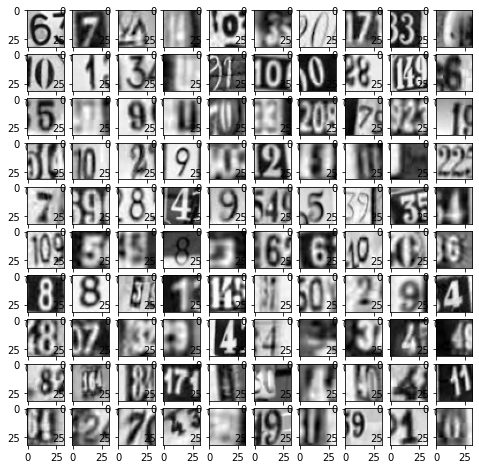

In [45]:
#Print few images in the training dataset
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [46]:
#Check the initial values in the target
y_train[1:64]

array([6, 7, 4, 4, 0, 3, 0, 7, 3, 1, 0, 1, 3, 1, 1, 0, 0, 8, 4, 6, 5, 7,
       9, 1, 0, 3, 0, 7, 2, 1, 1, 0, 2, 9, 0, 2, 5, 1, 3, 2, 7, 9, 8, 4,
       9, 4, 5, 9, 3, 4, 0, 5, 5, 8, 3, 6, 6, 0, 0, 6, 8, 8, 3],
      dtype=uint8)

In [47]:
#Looks like the target classes are all the single digits
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
# input image dimensions
img_rows, img_cols = 32, 32

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [49]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing the input
X_train /= 255.0
X_test /= 255.0
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (42000, 32, 32, 1)
42000 train samples
18000 test samples


In [0]:
#Define batch_size, num_classes, epochs
batch_size = 128
num_classes = 10
epochs = 50

In [51]:
print(y_train[0])

2


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [53]:
print(y_train[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu'))

#Add a Batch Normalization layer
model.add(BatchNormalization())

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax'))

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [56]:
#Print the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [57]:
#Import tensorboardcolab modules for creating a tensorboard call back which will passed in model.fit function.
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

#Tensorboard callback is going to be added to model.fit function to draw graphs of loss values after every epoch
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://e4cc598f.ngrok.io


In [0]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('street_view_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [59]:
#Training on the dataset and adding the all the callbacks to the fit function.
#Once the training starts, results start appearing on Tensorboard after 1 epoch
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[TensorBoardColabCallback(tbc),early_stopping,model_checkpoint])

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 9s 222us/step - loss: 1.1135 - acc: 0.6342 - val_loss: 0.5523 - val_acc: 0.8322

Epoch 00001: val_loss improved from inf to 0.55227, saving model to street_view_cnn_checkpoint_01_loss0.5523.h5
Epoch 2/50
42000/42000 [==============================] - 9s 211us/step - loss: 0.6526 - acc: 0.7984 - val_loss: 0.5075 - val_acc: 0.8471

Epoch 00002: val_loss improved from 0.55227 to 0.50749, saving model to street_view_cnn_checkpoint_02_loss0.5075.h5
Epoch 3/50
42000/42000 [==============================] - 9s 212us/step - loss: 0.5607 - acc: 0.8239 - val_loss: 0.4151 - val_acc: 0.8761

Epoch 00003: val_loss improved from 0.50749 to 0.41513, saving model to street_view_cnn_checkpoint_03_loss0.4151.h5
Epoch 4/50
42000/42000 [==============================] - 9s 213us/step - loss: 0.5152 - acc: 0.8402 - val_loss: 0.4437 - val_acc: 0.8721

Epoch 00004: val_loss did not improve from 0.41513

In [60]:
#Testing the model on test set
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18000/18000 [==============================] - 2s 114us/step
Test loss: 0.34341381618711686
Test accuracy: 0.9085


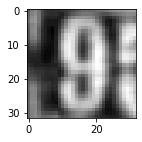

9


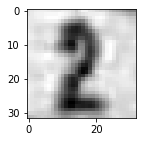

2


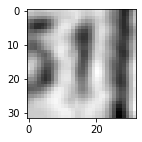

1


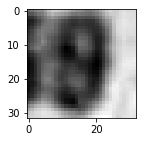

9


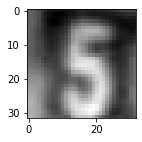

5


In [61]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[3].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[3].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[2].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[2].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[33].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[33].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[59].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[59].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[36].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[36].reshape(1,32,32,1))))

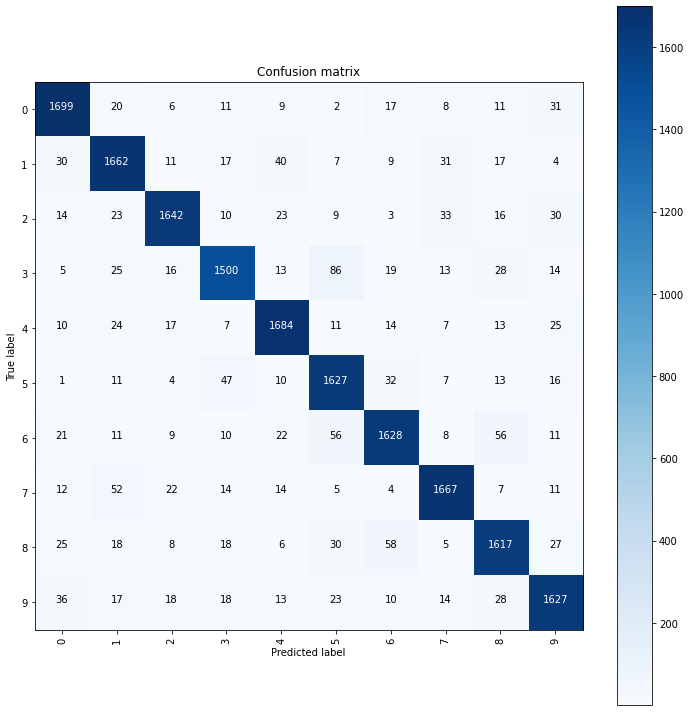

In [62]:
from sklearn.metrics import confusion_matrix
import itertools

classes = ['0','1','2','3','4','5','6','7','8','9']
#Print the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = model.predict(X_test)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(y_test, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = classes)